In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv("/content/tr_eikon_eod_data (1).csv")

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1972 non-null   object 
 1   AAPL.O  1972 non-null   float64
 2   MSFT.O  1972 non-null   float64
 3   INTC.O  1972 non-null   float64
 4   AMZN.O  1972 non-null   float64
 5   GS.N    1972 non-null   float64
 6   SPY     1972 non-null   float64
 7   .SPX    1972 non-null   float64
 8   .VIX    1972 non-null   float64
 9   EUR=    1972 non-null   float64
 10  XAU=    1972 non-null   float64
 11  GDX     1972 non-null   float64
 12  GLD     1972 non-null   float64
dtypes: float64(12), object(1)
memory usage: 200.4+ KB


In [ ]:
df= df[['Date','AAPL.O']]

In [ ]:
df

,Date,AAPL.O
0,2010-01-04,30.572827
1,2010-01-05,30.625684
2,2010-01-06,30.138541
3,2010-01-07,30.082827
4,2010-01-08,30.282827
...,...,...
1967,2017-10-25,156.410000
1968,2017-10-26,157.410000
1969,2017-10-27,163.050000
1970,2017-10-30,166.720000


In [ ]:
df

,Date,AAPL.O
0,2010-01-04,30.572827
1,2010-01-05,30.625684
2,2010-01-06,30.138541
3,2010-01-07,30.082827
4,2010-01-08,30.282827
...,...,...
1967,2017-10-25,156.410000
1968,2017-10-26,157.410000
1969,2017-10-27,163.050000
1970,2017-10-30,166.720000


In [ ]:
import datetime
def str_to_datetime(s):
  split= s.split('-')
  year, month, day=int(split[0]),int(split[1]),int(split[2])
  Date= datetime.datetime(year= year,month=month ,day=day)
  return Date

str_to_datetime('2024-12-5')

datetime.datetime(2024, 12, 5, 0, 0)

In [ ]:
df.Date=df.Date.apply(str_to_datetime)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1972 non-null   datetime64[ns]
 1   AAPL.O  1972 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.9 KB


In [ ]:
df.index= df.pop('Date')

In [ ]:
df

,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827
...,...
2017-10-25,156.410000
2017-10-26,157.410000
2017-10-27,163.050000


In [ ]:
df['lag1']=df['AAPL.O'].shift(-1)
df['lag2']=df['AAPL.O'].shift(-2)
df['lag3']=df['AAPL.O'].shift(-3)

<Axes: xlabel='Date'>

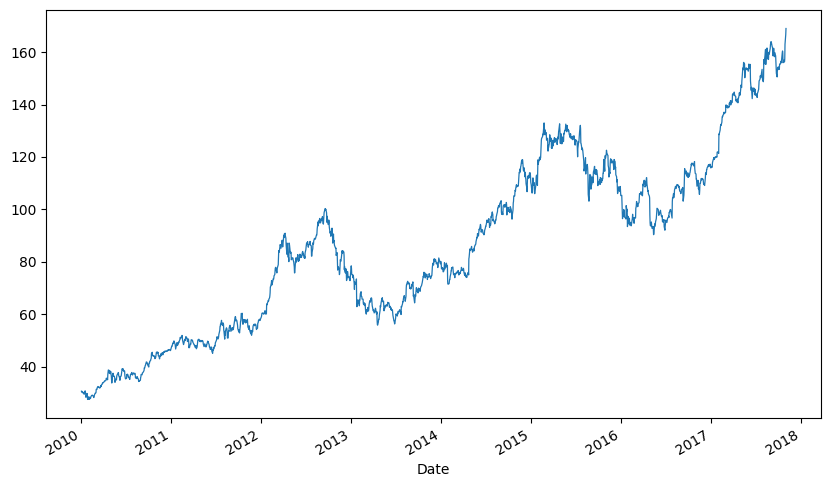

In [ ]:
df['AAPL.O'].plot(lw=0.9,figsize=(10,6))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  1972 non-null   float64
 1   lag1    1971 non-null   float64
 2   lag2    1970 non-null   float64
 3   lag3    1969 non-null   float64
dtypes: float64(4)
memory usage: 77.0 KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,AAPL.O,lag1,lag2,lag3
Date,,,,
2010-01-04,30.572827,30.625684,30.138541,30.082827
2010-01-05,30.625684,30.138541,30.082827,30.282827
2010-01-06,30.138541,30.082827,30.282827,30.015684
2010-01-07,30.082827,30.282827,30.015684,29.674256
2010-01-08,30.282827,30.015684,29.674256,30.092827
...,...,...,...,...
2017-10-20,156.250000,156.170000,157.100000,156.410000
2017-10-23,156.170000,157.100000,156.410000,157.410000
2017-10-24,157.100000,156.410000,157.410000,163.050000


In [ ]:
def date_X_y(df):
  df_as_np=  df.to_numpy()
  Date= df.index
  X= df_as_np[:,1:]
  y= df_as_np[:,1]
  return Date, X.astype(np.float32),y.astype(np.float32)

In [ ]:
Date,X,y= date_X_y(df)

In [ ]:
len(X)

1969

In [ ]:
q_8=  int(len(df) *.8)
q_9=  int(len(df) *.9)

In [ ]:
Date_train, X_train,y_train= Date[:q_8], X[:q_8],y[:q_8]

Date_test, X_test, y_test= Date[q_8:], X[q_8:],y[q_8:]

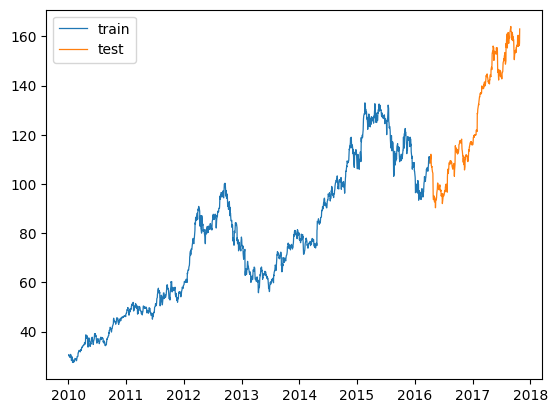

In [ ]:
plt.plot(Date_train,y_train,lw=0.9)

plt.plot(Date_test,y_test,lw=0.9)

plt.legend(['train','test','all'])

In [ ]:
len(X_train)

1575

In [ ]:
len(X_test)

394

In [ ]:
1575+394

1969

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM , Input
from keras.optimizers import Adam  # Make sure to import Adam


In [ ]:
model= Sequential()
model.add(Input((3,1)))
model.add(LSTM(100))
model.add(Dense(90,activation='relu'))
model.add(Dense(80,activation='sigmoid'))
model.add(Dense(60,activation='sigmoid'))
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 90)                  │           9,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 80)                  │           7,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 60)                  │           4,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,091 (242.54 KB)

 Trainable params: 62,091 (242.54 KB)

 Non-trainable params: 0 (0.00 B)

:

In [ ]:
model.compile(loss='mse',optimizer= Adam(learning_rate=0.001),metrics=['mae'])

In [ ]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 141.7856 - mae: 7.3137
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 111.1602 - mae: 5.1531
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 96.2325 - mae: 4.7159
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 84.6215 - mae: 4.4518
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.3358 - mae: 3.6776
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.8825 - mae: 3.6501
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 47.1020 - mae: 3.3099
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.5766 - mae: 2.7894
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 40.2709 - mae: 3.1248
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.0118 - mae: 2.5821
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.4489 - mae: 2.3761
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.8922 - mae: 2.2579
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━

In [ ]:
y_predict=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
y_predict

array([[108.397896],
       [109.3091  ],
       [110.81996 ],
       [111.5765  ],
       [110.46673 ],
       [108.21678 ],
       [106.73593 ],
       [106.54506 ],
       [106.09973 ],
       [105.349396],
       [104.91104 ],
       [104.32594 ],
       [100.99311 ],
       [ 96.03191 ],
       [ 93.77954 ],
       [ 93.0155  ],
       [ 93.63332 ],
       [ 94.19597 ],
       [ 93.21062 ],
       [ 92.40775 ],
       [ 92.09216 ],
       [ 92.42688 ],
       [ 92.515656],
       [ 91.063156],
       [ 89.66988 ],
       [ 91.14491 ],
       [ 93.060875],
       [ 93.27887 ],
       [ 93.75376 ],
       [ 93.921074],
       [ 95.01974 ],
       [ 96.35036 ],
       [ 97.98828 ],
       [ 99.37356 ],
       [ 99.81985 ],
       [ 99.59673 ],
       [ 98.700264],
       [ 97.54347 ],
       [ 97.17036 ],
       [ 97.59461 ],
       [ 98.20013 ],
       [ 98.37712 ],
       [ 98.66628 ],
       [ 98.75496 ],
       [ 97.60664 ],
       [ 96.784195],
       [ 96.70271 ],
       [ 96.7

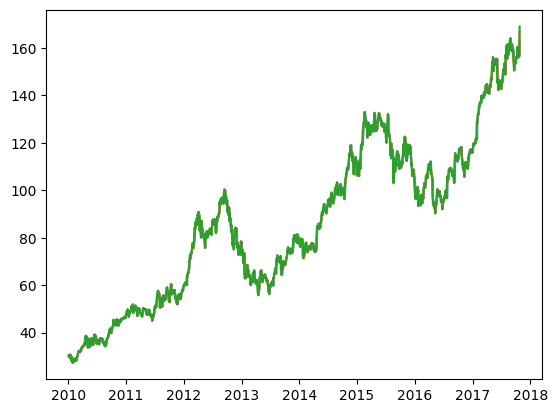

In [ ]:
plt.plot(Date,X)


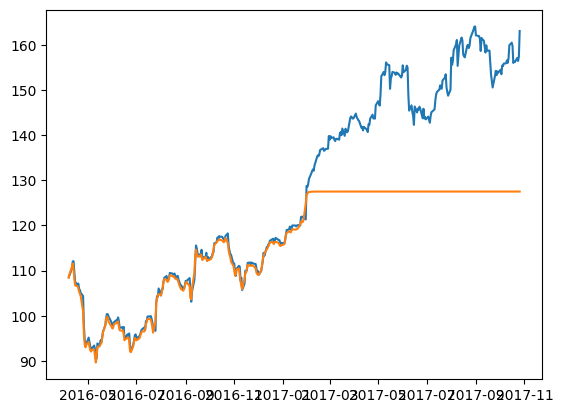

In [ ]:
plt.plot(Date_test,y_test)
plt.plot(Date_test,y_predict)


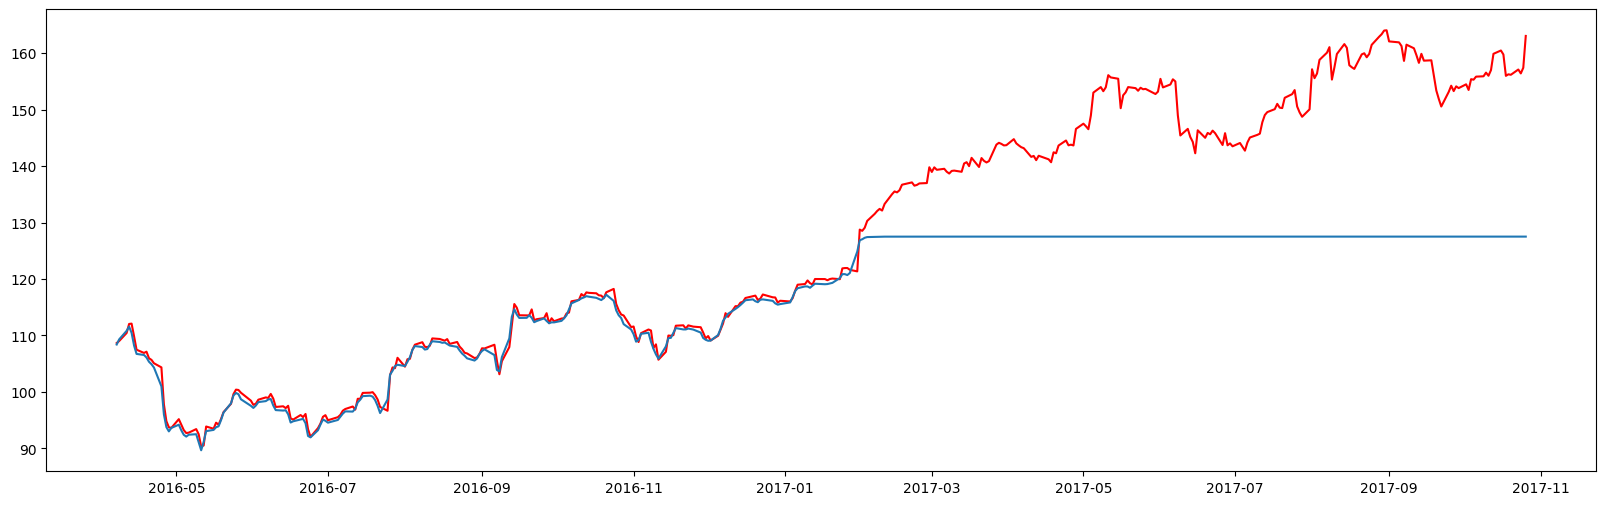

In [ ]:
plt.figure(figsize=(20


                    ,6))
plt.plot(Date_test,y_test,c='r')
plt.plot(Date_test,y_predict)


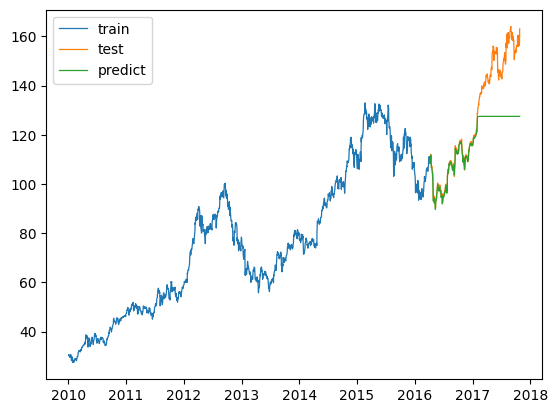

In [ ]:
plt.plot(Date_train,y_train,lw=0.9)

plt.plot(Date_test,y_test,lw=0.9)
plt.plot(Date_test,y_predict,lw=0.9)

plt.legend(['train','test','predict'])